# Logistic Regression (Classification)

Use of Binary Cross Entropy Loss Function with Logits, to avoid numerical instability that brings the use of a **sigmoid function**. The idea is to combine the loss function (Binary Cross Entropy) and the activation function (Sigmoid), the logs of one cancel the exp of the other. 

## 01. Load the data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


## 02. Data Analysis 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target.shape

(569,)

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Features

In [7]:
df = pd.DataFrame(columns=data.feature_names,data = data.data)

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Stats

In [9]:
df.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
X,Y = data.data,data.target 
N,D = X.shape
(N,D)

(569, 30)

In [11]:
#(num_samples x num_dimensions)
X = X.reshape(N,D)
Y = Y.reshape(N,1)

## 02. Data Preprocessing 

### Split the Data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33)

In [13]:
(X_train.shape,y_train.shape)

((381, 30), (381, 1))

In [14]:
(X_test.shape,y_test.shape)

((188, 30), (188, 1))

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
#Scale Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
#Scale Testing Data
X_test_scaled = scaler.transform(X_test)

## 03. Model

### Model

In [18]:
model = nn.Linear(D,1)

### Loss and Optimizer

In [19]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

### Change inputs/outputs to torch tensors

In [20]:
'''
Pytorch does not work with Numpy Arrays, but with Torch Tensors
Pytorch uses float32 by default, Numpy Creates float64 by default 
'''
inputs = torch.from_numpy(X_train_scaled.astype(np.float32))
targets = torch.from_numpy(y_train.astype(np.float32))

In [21]:
test_inputs = torch.from_numpy(X_test_scaled.astype(np.float32))
test_targets = torch.from_numpy(y_test.astype(np.float32))

## 05. Train the Model

In [22]:
n_epochs = 1000 
train_losses = []
test_losses = []

In [23]:
for epoch in range(n_epochs):
  #zero gradients
  optimizer.zero_grad()

  #forward
  outputs = model(inputs)
  loss = criterion(outputs,targets) 
  
  #test loss 
  outputs_test = model(test_inputs)
  loss_test = criterion(outputs_test,test_targets)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())
  
  #backward and optimize
  loss.backward()
  optimizer.step()

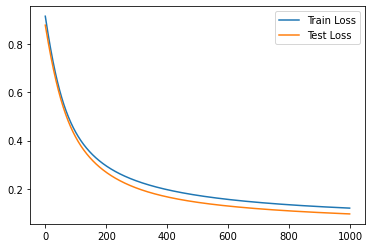

In [24]:
plt.plot(train_losses,label = "Train Loss")
plt.plot(test_losses,label = "Test Loss")
plt.legend()
plt.show()

## 06. Test Model

In [25]:
with torch.no_grad():
  p_train = model(inputs)
  # the outpus can be any number
  p_train = np.array(p_train.numpy() > 0) 
  train_acc = np.mean(targets.numpy() == p_train)

  p_test = model(test_inputs)
  p_test = np.array(p_test.numpy() > 0)
  test_acc = np.mean(test_targets.numpy() == p_test)
  print(f'Train accuracy: {train_acc:0.4},Test accuracy: {test_acc:0.4}')

Train accuracy: 0.9659,Test accuracy: 0.9894
